### 数据预处理：让数据适应模型，匹配模型的需求
### 特征工程：降低计算成本，提升模型上限（数据决定了模型的上限）
##### 数据无量纲化：将不同数据规格的数据转换到统一规格
##### 线性无量纲化包括去中心化（让所有记录减去一个固定值）和缩放处理（将数值限定在某一范围内，例如取对数）
##### 归一化(Normalization)：(x-min)/(max-min)，将数据规范到[0,1],归一化后数据服从正态分布
##### 正则化(Rgularization):不是数据预处理的手段


In [2]:
from sklearn.preprocessing import MinMaxScaler
data=[[-1,2],[0,4],[10,4],[1,19]]
import pandas as pd
data=pd.DataFrame(data)
data

,0,1
0,-1,2
1,0,4
2,10,4
3,1,19


In [9]:
# 归一化
scaler=MinMaxScaler() #实例化
scaler=scaler.fit(data) #生成min(x)和max(x)
result=scaler.transform(data) #调用接口导出结果
result

array([[0.        , 0.        ],
       [0.09090909, 0.11764706],
       [1.        , 0.11764706],
       [0.18181818, 1.        ]])

In [11]:
# 直接一行代替
result_=scaler.fit_transform(data)
result_

array([[0.        , 0.        ],
       [0.09090909, 0.11764706],
       [1.        , 0.11764706],
       [0.18181818, 1.        ]])

In [12]:
result_=scaler.fit_transform(data)
scaler.inverse_transform(result) #将归一化数据结果逆转

array([[-1.,  2.],
       [ 0.,  4.],
       [10.,  4.],
       [ 1., 19.]])

In [15]:
# feature_range设置归化范围
data=[[-1,2],[0,4],[10,4],[1,19]]
scaler=MinMaxScaler(feature_range=[5,10])
result=scaler.fit_transform(data)
result

array([[ 5.        ,  5.        ],
       [ 5.45454545,  5.58823529],
       [10.        ,  5.58823529],
       [ 5.90909091, 10.        ]])

In [18]:
# 当数据集中数据量比较大的时候，fit会报错，可以用partial_fir作为训练接口
scaler=scaler.partial_fit(data)
result=scaler.transform(data)
result

array([[ 5.        ,  5.        ],
       [ 5.45454545,  5.58823529],
       [10.        ,  5.58823529],
       [ 5.90909091, 10.        ]])

In [22]:
# 使用numpy实现归一化
import numpy as np
x=np.array([[-1,2],[0,4],[10,4],[1,19]])


# 归一化
x_nor=((x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))
x_nor

# 逆转归一化
x_returned=x_nor*(x.max(axis=0)-x.min(axis=0))+x.min(axis=0)
x_returned

array([[-1.,  2.],
       [ 0.,  4.],
       [10.,  4.],
       [ 1., 19.]])

In [23]:
# 按列
x.max(axis=0)

array([10, 19])

In [24]:
# 按行
x.max(axis=1)

array([ 2,  4, 10, 19])

In [25]:
# 按全局
x.max()

19

### 数据标准化(Standardization)，也叫Z_score标准化，当数据(x)按均值（u）中心化后再按标准差(sigma)缩放 x_heat=(x-u)/sigma

In [42]:
from sklearn.preprocessing import StandardScaler
data=[[-1,2],[0,4],[10,4],[1,19]]

scaler=StandardScaler()
scaler.fit(data) #生成均值和方差

scaler.mean_ #查看均值
scaler.var_ #查看方差
print("均值：",scaler.mean_)
print("方差：",scaler.var_)

x_std=scaler.transform(data) #导出结果为一个数组
x_std.mean() #查看均值
x_std.std() #查看方差
x_std

scaler.fit_transform(data) #使用fit_transform(data)一步达成结果
scaler.inverse_transform(x_std) #使用inverse_trsnsform逆转标准化

均值： [2.5  7.25]
方差： [19.25   46.6875]


array([[-1.0000000e+00,  2.0000000e+00],
       [-4.4408921e-16,  4.0000000e+00],
       [ 1.0000000e+01,  4.0000000e+00],
       [ 1.0000000e+00,  1.9000000e+01]])

### 缺失值处理

In [47]:
import pandas as pd
# data=pd.read_csv(r"data.csv",index_col=0) #使用第0列作为索引列

from sklearn.impute import SimpleImputer

### SimpleImputer四个参数：
##### missing_values 数据的缺失值类型，默认为np.nan
##### strategy 填充的类型：mean、median(中值)、most_frequent(众数，可以用于文字)、constant(常数)
##### fill_value 指定填充的值（可以填充字符串）
##### copy 默认为True，将创建特征矩阵的副本，反之则会将缺失值填补到原始特征矩阵中

In [2]:
# 创建一个数据集
age=[]
for i in range(100):
    if i%2==0 or i%3==0:
        age.append(i)
    else:
        age.append(None)
        
logo=[]
for i in range(100):
    if i%2==0:
        logo.append('S')
        continue
    if i%3==0:
        logo.append("C")
        continue
    if i%5==0:
        logo.append('K')
        continue
    else:
        logo.append(None)
        continue
id=[]
for i in range(100):
    id.append("id_"+str(i))
    
data=pd.DataFrame()
data['age']=age
data['logo']=logo
data['id']=id
data.head(5)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     67 non-null     float64
 1   logo    74 non-null     object 
 2   id      100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [3]:
age=data.loc[:,'age'].values.reshape(-1,1) #升维

In [4]:
age=data.loc[:,'age'].values.reshape(-1,1) #升维
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer() #默认均值填充
imp_median=SimpleImputer(strategy="median") #使用中位数填充
imp_0=SimpleImputer(strategy="constant",fill_value=0) #使用0填充

imp_mean=imp_mean.fit_transform(age)
imp_median=imp_median.fit_transform(age)
imp_0=imp_0.fit_transform(age)

imp_mean[:20]
imp_median[:20]
imp_0[:20]

# 使用中位数进行填充
data.loc[:,"age"]=imp_median
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     100 non-null    float64
 1   logo    74 non-null     object 
 2   id      100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [5]:
# 填充logo
logo=data.loc[:,"logo"].values.reshape(-1,1)
# imp_mode=SimpleImputer(strategy="constant",fill_value="S")
imp_mode=SimpleImputer(strategy="most_frequent")
data.loc[:,'logo']=imp_mode.fit_transform(logo)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     100 non-null    float64
 1   logo    74 non-null     object 
 2   id      100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [6]:
# 创建一个数据集
age=[]
for i in range(100):
    if i%2==0 or i%3==0:
        age.append(i)
    else:
        age.append(None)
        
logo=[]
for i in range(100):
    if i%2==0:
        logo.append('S')
        continue
    if i%3==0:
        logo.append("C")
        continue
    if i%5==0:
        logo.append('K')
        continue
    else:
        logo.append(None)
        continue
id=[]
for i in range(100):
    id.append("id_"+str(i))
    
data=pd.DataFrame()
data['age']=age
data['logo']=logo
data['id']=id
data.head(5)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     67 non-null     float64
 1   logo    74 non-null     object 
 2   id      100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [7]:
# 删除所有空值的行，删除列使用axis=1
data_.dropna(axis=0,inplace=True)
data_.info()

NameError: name 'data_' is not defined

### 编码与哑变量：用于处理分类型变量


In [8]:
# 创建一个数据集
age=[]
for i in range(100):
    if i%2==0 or i%3==0:
        age.append(i)
    else:
        age.append(None)
        
logo=[]
for i in range(100):
    if i%2==0:
        logo.append('S')
        continue
    if i%3==0:
        logo.append("C")
        continue
    if i%5==0:
        logo.append('K')
        continue
    else:
        logo.append(None)
        continue
id=[]
for i in range(100):
    id.append("id_"+str(i))
    

survivd=[]
for i in range(100):
    if i%2==0 and i%3==0:
        survivd.append("survivd")
    else:
        survivd.append('dead')
data=pd.DataFrame()
data['age']=age
data['logo']=logo
data['id']=id
data['survivd']=survivd


# 缺失值处理
import pandas as pd
# 使用pandas进行填充
data_=data
data_.loc[:,'age']=data.loc[:,'age'].fillna(data.loc[:,'age'].median())


# 删除所有空值的行，删除列使用axis=1
data_.dropna(axis=0,inplace=True)
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      74 non-null     float64
 1   logo     74 non-null     object 
 2   id       74 non-null     object 
 3   survivd  74 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.9+ KB


### 标签编码 LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder
y=data.iloc[:,-1] #要输入的为标签，不是特征矩阵，允许为一维
le=LabelEncoder() #实例化
le=le.fit(y) #导入数据
label=le.transform(y) #接口调用

le.classes_ #属性、查看类别数量
label #查看编码后的数据

le.fit_transform(y) #一步到位
le.inverse_transform(label) #使用reverse_transform进行逆转
data.iloc[:,-1]=label
data.head(5)


,age,logo,id,survivd
0,0.0,S,id_0,1
2,2.0,S,id_2,0
3,3.0,C,id_3,0
4,4.0,S,id_4,0
5,50.0,K,id_5,0


In [10]:
# 一步到位
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1]=LabelEncoder().fit_transform(data.iloc[:,-1])
data.head(5)

,age,logo,id,survivd
0,0.0,S,id_0,1
2,2.0,S,id_2,0
3,3.0,C,id_3,0
4,4.0,S,id_4,0
5,50.0,K,id_5,0


### 特征专用编码 OrdnalEncoder

In [11]:
from sklearn.preprocessing import OrdinalEncoder

data_=data.copy()
# 编码后
data_.iloc[:,1:-1]=OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
data.head()
data_.head()

,age,logo,id,survivd
0,0.0,2.0,0.0,1
2,2.0,2.0,7.0,0
3,3.0,0.0,16.0,0
4,4.0,2.0,25.0,0
5,50.0,1.0,32.0,0


In [12]:
# 查看原始数据的类别
OrdinalEncoder().fit(data.iloc[:,1:-1]).categories_

[array(['C', 'K', 'S'], dtype=object),
 array(['id_0', 'id_10', 'id_12', 'id_14', 'id_15', 'id_16', 'id_18',
        'id_2', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26',
        'id_27', 'id_28', 'id_3', 'id_30', 'id_32', 'id_33', 'id_34',
        'id_35', 'id_36', 'id_38', 'id_39', 'id_4', 'id_40', 'id_42',
        'id_44', 'id_45', 'id_46', 'id_48', 'id_5', 'id_50', 'id_51',
        'id_52', 'id_54', 'id_55', 'id_56', 'id_57', 'id_58', 'id_6',
        'id_60', 'id_62', 'id_63', 'id_64', 'id_65', 'id_66', 'id_68',
        'id_69', 'id_70', 'id_72', 'id_74', 'id_75', 'id_76', 'id_78',
        'id_8', 'id_80', 'id_81', 'id_82', 'id_84', 'id_85', 'id_86',
        'id_87', 'id_88', 'id_9', 'id_90', 'id_92', 'id_93', 'id_94',
        'id_95', 'id_96', 'id_98', 'id_99'], dtype=object)]

In [13]:
# 查看编码后的类别
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_

[array([0., 1., 2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73.])]

### 由于单纯使用数字编码会丢失一些重要的信息
### 使用独热编码进行处理

In [14]:
from sklearn.preprocessing import OneHotEncoder
data.head()

,age,logo,id,survivd
0,0.0,S,id_0,1
2,2.0,S,id_2,0
3,3.0,C,id_3,0
4,4.0,S,id_4,0
5,50.0,K,id_5,0


In [15]:
x=data.iloc[:,1:-1]
enc=OneHotEncoder(categories="auto").fit(x)
result=enc.transform(x).toarray()
result

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [16]:
# 还原数据
pd.DataFrame(enc.inverse_transform(result))

,0,1
0,S,id_0
1,S,id_2
2,C,id_3
3,S,id_4
4,K,id_5
...,...,...
69,S,id_94
70,K,id_95
71,S,id_96
72,S,id_98


In [17]:
# 获取特征名字
enc.get_feature_names()

array(['x0_C', 'x0_K', 'x0_S', 'x1_id_0', 'x1_id_10', 'x1_id_12',
       'x1_id_14', 'x1_id_15', 'x1_id_16', 'x1_id_18', 'x1_id_2',
       'x1_id_20', 'x1_id_21', 'x1_id_22', 'x1_id_24', 'x1_id_25',
       'x1_id_26', 'x1_id_27', 'x1_id_28', 'x1_id_3', 'x1_id_30',
       'x1_id_32', 'x1_id_33', 'x1_id_34', 'x1_id_35', 'x1_id_36',
       'x1_id_38', 'x1_id_39', 'x1_id_4', 'x1_id_40', 'x1_id_42',
       'x1_id_44', 'x1_id_45', 'x1_id_46', 'x1_id_48', 'x1_id_5',
       'x1_id_50', 'x1_id_51', 'x1_id_52', 'x1_id_54', 'x1_id_55',
       'x1_id_56', 'x1_id_57', 'x1_id_58', 'x1_id_6', 'x1_id_60',
       'x1_id_62', 'x1_id_63', 'x1_id_64', 'x1_id_65', 'x1_id_66',
       'x1_id_68', 'x1_id_69', 'x1_id_70', 'x1_id_72', 'x1_id_74',
       'x1_id_75', 'x1_id_76', 'x1_id_78', 'x1_id_8', 'x1_id_80',
       'x1_id_81', 'x1_id_82', 'x1_id_84', 'x1_id_85', 'x1_id_86',
       'x1_id_87', 'x1_id_88', 'x1_id_9', 'x1_id_90', 'x1_id_92',
       'x1_id_93', 'x1_id_94', 'x1_id_95', 'x1_id_96', 'x1_id_98',
   

In [18]:
# axis=1表示跨行进行合并，将两表左右相连，如果axis=0，就是将两个表上下拼接
newData=pd.concat([data,pd.DataFrame(result)],axis=1)
newData.head()

,age,logo,id,survivd,0,1,2,3,4,5,...,67,68,69,70,71,72,73,74,75,76
0,0.0,S,id_0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,S,id_2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,C,id_3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,S,id_4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
newData.drop(['logo','id'],axis=1,inplace=True)

In [20]:
newData.head()

,age,survivd,0,1,2,3,4,5,6,7,...,67,68,69,70,71,72,73,74,75,76
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
newData.columns=['age','survivd','x0_C', 'x0_K', 'x0_S', 'x1_id_0', 'x1_id_10', 'x1_id_12',
       'x1_id_14', 'x1_id_15', 'x1_id_16', 'x1_id_18', 'x1_id_2',
       'x1_id_20', 'x1_id_21', 'x1_id_22', 'x1_id_24', 'x1_id_25',
       'x1_id_26', 'x1_id_27', 'x1_id_28', 'x1_id_3', 'x1_id_30',
       'x1_id_32', 'x1_id_33', 'x1_id_34', 'x1_id_35', 'x1_id_36',
       'x1_id_38', 'x1_id_39', 'x1_id_4', 'x1_id_40', 'x1_id_42',
       'x1_id_44', 'x1_id_45', 'x1_id_46', 'x1_id_48', 'x1_id_5',
       'x1_id_50', 'x1_id_51', 'x1_id_52', 'x1_id_54', 'x1_id_55',
       'x1_id_56', 'x1_id_57', 'x1_id_58', 'x1_id_6', 'x1_id_60',
       'x1_id_62', 'x1_id_63', 'x1_id_64', 'x1_id_65', 'x1_id_66',
       'x1_id_68', 'x1_id_69', 'x1_id_70', 'x1_id_72', 'x1_id_74',
       'x1_id_75', 'x1_id_76', 'x1_id_78', 'x1_id_8', 'x1_id_80',
       'x1_id_81', 'x1_id_82', 'x1_id_84', 'x1_id_85', 'x1_id_86',
       'x1_id_87', 'x1_id_88', 'x1_id_9', 'x1_id_90', 'x1_id_92',
       'x1_id_93', 'x1_id_94', 'x1_id_95', 'x1_id_96', 'x1_id_98',
       'x1_id_99']

In [22]:
newData.head()

,age,survivd,x0_C,x0_K,x0_S,x1_id_0,x1_id_10,x1_id_12,x1_id_14,x1_id_15,...,x1_id_88,x1_id_9,x1_id_90,x1_id_92,x1_id_93,x1_id_94,x1_id_95,x1_id_96,x1_id_98,x1_id_99
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 处理连续型特征：二值化与分段
##### 二值化：将数值转换为0和1
##### 分段：将数据进行切分

In [23]:
data2=newData.copy()
data2.head()

,age,survivd,x0_C,x0_K,x0_S,x1_id_0,x1_id_10,x1_id_12,x1_id_14,x1_id_15,...,x1_id_88,x1_id_9,x1_id_90,x1_id_92,x1_id_93,x1_id_94,x1_id_95,x1_id_96,x1_id_98,x1_id_99
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# labelencoder
data2.iloc[:,1]=LabelEncoder().fit_transform(data2.iloc[:,1])

In [25]:
data2.head()

,age,survivd,x0_C,x0_K,x0_S,x1_id_0,x1_id_10,x1_id_12,x1_id_14,x1_id_15,...,x1_id_88,x1_id_9,x1_id_90,x1_id_92,x1_id_93,x1_id_94,x1_id_95,x1_id_96,x1_id_98,x1_id_99
0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#填补缺失值后的数据
# 缺失值处理
import pandas as pd
# 使用pandas进行填充
data_=data2
data_.loc[:,'age']=data.loc[:,'age'].fillna(data.loc[:,'age'].median())
data_.head()
# 删除缺失值
data_.dropna(axis=0,inplace=True)

# 使用preprocessing.KBinsDiscretizer进行处理


### 参数介绍
##### n_bins: 每个特征中分箱的个数，默认为5
##### encode:one-hot (做哑变量，返回一个稀疏矩阵)，oridianl(每个特征的每个分箱会编码为一个数)，onehot-dense(返回一个密集数组)
##### strategy:用来定义箱宽的方式，默认”quantile“
##### 取值有：uniform(表示等宽分箱)，quantile(等位分箱)，kmeans(按聚类分箱)

In [47]:
from sklearn.preprocessing import KBinsDiscretizer
x=data_.iloc[:,0].values.reshape(-1,1)
est=KBinsDiscretizer(n_bins=3
                    ,encode="ordinal"
                    ,strategy="uniform"
                    )
est.fit(x)


# 使用降维查看转换后的分值，变成了一列中的三箱
set(est.fit_transform(x).ravel())

{0.0, 1.0, 2.0}

In [48]:
est=KBinsDiscretizer(n_bins=3
                     ,encode="onehot"
                     ,strategy="uniform"
                    )

# 查看转换后的分支，变成了哑变量
est.fit_transform(x).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

### 特征处理
##### 特征提取
##### 特征创造：根据现有特征构造新的组合特征
##### 特征选择：去掉对目标预测值相关性较低的特征

### 特征选择
#### 过滤法
#####  1.方差过滤:降低计算成本
##### 2.相关性过滤：挑选与标签相关性较高的特征

In [81]:
import pandas as pd
#填补缺失值后的数据
# 缺失值处理
import pandas as pd
# 使用pandas进行填充
data_=data2

data2.head()
x=data2.loc[:,data2.columns!="survivd"]
y=data2.loc[:,"survivd"]
x.shape

(54, 78)

In [82]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold() #实例化,默认使用方差0进行过滤

x_var0=selector.fit_transform(x) #获取删除不合格特征之后的新特征矩阵
x_var0.shape

(54, 58)

In [83]:
import numpy as np
# 获取方差的中位数
np.median(x.var().values)
# 根据方差的中位数进行过滤
x_fsvar=VarianceThreshold(np.median(x.var().values)).fit_transform(x)
x_fsvar.shape

(54, 4)

In [84]:
# 使用指定的方差作为阈值进行过滤
x_bar=VarianceThreshold(.8*(1-.8)).fit_transform(x)
x_bar.shape

(54, 3)

### 调用模型

In [92]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np


x=data2.loc[:,data2.columns!="survivd"]
y=data2.loc[:,"survivd"]

x_fsvar=VarianceThreshold(np.median(x.var().values)).fit_transform(x)
x_fsvar.shape

(54, 4)

In [90]:
# 使用KNN模型过滤前后进行对比
# 查看Cell运行时间 %%timeit
cross_val_score(KNN(),x,y,cv=5).mean()

0.76

In [91]:
cross_val_score(KNN(),x_fsvar,y,cv=5).mean()

0.76

In [97]:
# 使用RFC模型对比过滤前后得分
cross_val_score(RFC(n_estimators=10,random_state=0),x,y,cv=5).mean()

0.76

In [99]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fsvar,y,cv=5).mean()

0.6690909090909092

### 相关性过滤
##### 1.卡方过滤（离散型数据）
##### 2.F检验（回归和分类）
##### 3.互信息过滤（回归于分类）

In [108]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# 使用经过方差过滤的数据进一步处理

x_fschi=SelectKBest(chi2,k=3).fit_transform(x_fsvar,y)
x_fschi.shape

(54, 3)

In [112]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()

0.6290909090909091

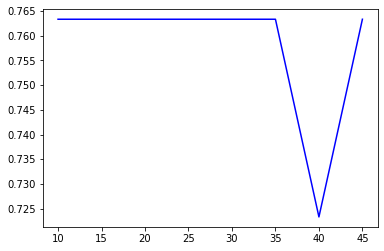

In [114]:
# 绘制k值的学习曲线
import matplotlib.pyplot as plt
score=[]
for i in range(10,50,5):
    x_fschi=SelectKBest(chi2,k=i).fit_transform(x_var0,y)
    once=cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=10).mean()
    score.append(once)
plt.plot(range(10,50,5),score,color="blue")
plt.show()
    

In [117]:
title=["数据差异","相关性","原假设"]
data1=["差异不是自然形成的","两组数据相关","拒绝原假设，接受备择假设"]
data2=["自然形成的差异","两组数据独立","接受原假设"]
import pandas as pd
datainfo=pd.DataFrame()
datainfo["P值"]=title
datainfo["<=0.05或0.01"]=data1
datainfo[">0.05或0.01"]=data2
datainfo

,P值,<=0.05或0.01,>0.05或0.01
0,数据差异,差异不是自然形成的,自然形成的差异
1,相关性,两组数据相关,两组数据独立
2,原假设,拒绝原假设，接受备择假设,接受原假设


In [121]:
# 获取卡方值和p值
chivalue,pvalues_chi=chi2(x_fsvar,y)
chivalue

array([0.77142926, 0.2089374 , 0.07745913, 0.01688555])

In [119]:
pvalues_chi

array([0.37977526, 0.64760153, 0.78077072, 0.8966104 ])

In [123]:
# k为需要保存的特征数量

k=chivalue.shape[0]-(pvalues_chi>0.05).sum()
k

0

### F检验
##### 离散型和连续型


In [128]:
from sklearn.feature_selection import f_classif #检验分类
from sklearn.feature_selection import f_regression #检验回归


F,pvalues_f=f_classif(x_fsvar,y)
F

array([0.06538827, 0.2539022 , 0.08584093, 0.04882629])

In [126]:
pvalues_f

array([0.79918258, 0.61646896, 0.77069871, 0.82598371])

In [127]:
# 找出p值大于0.05的特征量进行删除
F.shape[0]-(pvalues_f>0.05).sum()

0

### 互信息法
##### 离散型和连续型
##### 用来捕捉特征与标签的任何关系（线性和非线性）

In [140]:
from sklearn.feature_selection import mutual_info_classif as MIC  #分类
from sklearn.feature_selection import mutual_info_regression as MIR #回归
from sklearn.feature_selection import SelectKBest

result=MIC(x_fsvar,y)
k=result.shape[0]-sum(result<=0)
k

x_fsmic=SelectKBest(MIC,k).fit_transform(x_fsvar,y)
cross_val_score(RFC(n_estimators=10,random_state=0),x_fsmic,y,cv=5).mean()

d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass k=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


0.76

# 嵌入法

In [145]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_=RFC(n_estimators=10,random_state=0) #随机森林的实例化
x_embedded=SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y) #实例化embedded
x_embedded.shape

(54, 19)

In [147]:
RFC_.fit(x,y).feature_importances_.max()

0.13821196634778574

##### 根据threshold 绘制学习曲线
    

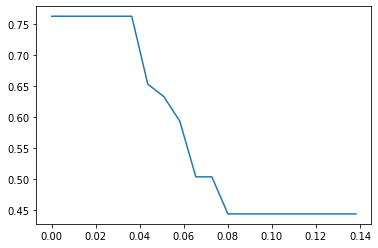

In [151]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# 使用linspace
threshold=np.linspace(0,RFC_.fit(x,y).feature_importances_.max(),20)

score=[]
for i in threshold:
    x_embedded=SelectFromModel(RFC_,threshold=i).fit_transform(x,y) #实例化embedded
    x_score=cross_val_score(RFC_,x_embedded,y,cv=10).mean()
    score.append(x_score)
    
plt.plot(threshold,score)
plt.show()

### 包装法
##### 目标函数：RFE，递归特征消除法

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_=RFC(n_estimators=10,random_state=0)
selector=RFE(RFC_,n_features_to_select=10,step=5).fit(x,y)
selector.support_.sum()

10

In [156]:
selector.ranking_

array([ 1,  3,  3,  3,  2,  6, 10,  6, 10,  1, 11, 11,  6, 11,  9, 11,  1,
       12,  8, 11,  9,  5, 13,  1,  7,  8,  6, 14, 14,  7,  2, 13,  4, 14,
        7,  8,  5,  3, 15,  5,  9,  8, 13,  1, 13,  4,  5,  3, 12, 12,  1,
       13, 10, 12,  4, 12,  1,  9,  4,  7,  2,  6, 14,  1, 15, 10,  7, 10,
        5, 15,  1, 15,  9,  8,  4, 15,  1, 14])

In [158]:
x_wrapper=selector.transform(x)
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.7236363636363636

### 根据n_feature_to_select绘制学习曲线


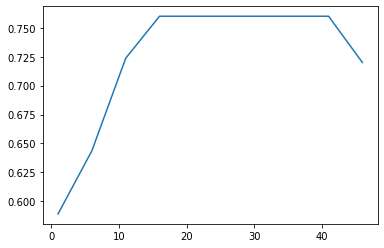

In [159]:
score=[]
for i in range(1,50,5):
    RFC_=RFC(n_estimators=10,random_state=0)
    selector=RFE(RFC_,n_features_to_select=i,step=5).fit(x,y)
    x_wrapper=selector.transform(x)
    t_score=cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(t_score)
    
plt.plot(range(1,50,5),score)
plt.show()
    